In [22]:
#Imports
import numpy as np
import matplotlib.pyplot as plt

In [23]:
#Functions 
def average_distance(d1, d2, sig, sz):
    to_return = []
    for i in range(len(d1)):
        d_left = np.random.normal(d1[i], sig, sz)
        d_right = np.random.normal(d2[i], sig, sz)
        to_return.append((d_left + d_right)/2)
    return to_return


def calculate_wavelength(a, ym, x, m):
    return (a*np.sin(np.arctan(ym/x)))/m

def average_hist_array(array):
    to_return = 0
    for i in range(len(array)):
        to_return += array[i]
    return to_return/len(array)

In [24]:
#Data

#Ordered by dist from center to null
std = 0.1 #cm
size = 1000000
#Distances in cm
#Red
red_data_right = np.array([2.7, 5.4, 7.7, 10.0, 12.5])
red_data_left = np.array([2.7, 5.2, 7.7, 10.3, 12.5])

#Green
green_data_left = np.array([1.8, 3.3, 5.3, 7.2, 8.8])
green_data_right = np.array([1.6, 3.3, 5.4, 6.8, 8.6])

#Averaged Data
red_data = average_distance(red_data_right, red_data_left, std, size)
green_data = average_distance(green_data_right, green_data_left, std, size)

Mean:  1.5
Standard Deviation:  0.02


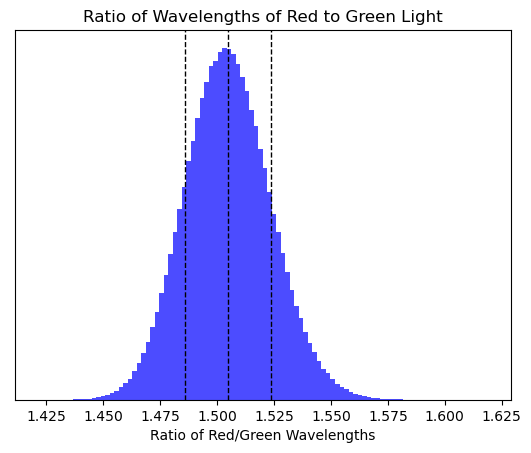

In [35]:
#Calculating the Ratio of the wavelengths of the two colors

#Distance to the laser to the whiteboard
laser = 726.7 #cm
laser_err = 0.1 #cm
laser_hist = np.random.normal(laser, laser_err, size)

#Equation to calculate lengths
# wavelength_red/wavelength_green = (sin(arctan(yr/x)))/(sin(arctan(yg/x)))
# x = distance from laser to whiteboard
# yr = distance from laser to red null
# yg = distance from laser to green null

def calculate_ratio(yr, yg, x):
    return (np.sin(np.arctan(yr/x)))/(np.sin(np.arctan(yg/x)))

#Calculating the ratio
ratios = []

#For each data point, calculate the ratio of the wavelengths
for i in range(len(red_data)):
    ratios.append(calculate_ratio(red_data[i], green_data[i], laser_hist))

#Average the ratios 
average_ratio = average_hist_array(ratios)

#Plotting the data
plt.hist(average_ratio, bins=100, color='blue', alpha=0.7, label='Ratio of Wavelengths')
plt.title('Ratio of Wavelengths of Red to Green Light')
plt.xlabel("Ratio of Red/Green Wavelengths")

#Mean and error
mean = np.mean(average_ratio)
std = np.std(average_ratio)
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(mean+std, color='k', linestyle='dashed', linewidth=1, label='1 sigma')
plt.axvline(mean-std, color='k', linestyle='dashed', linewidth=1, )
plt.yticks([])

print("Mean: ", round(mean, 2))
print("Standard Deviation: ", round(std, 2))

Average slit width:  0.020008635652437903


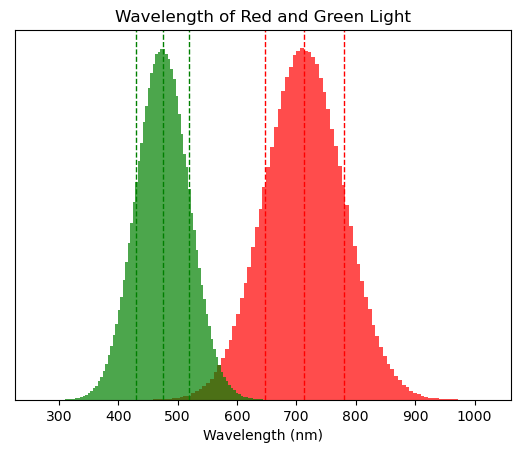

Green Mean: 475 nm
Green Standard Deviation: 44 nm
Red Mean: 713 nm
Red Standard Deviation: 66 nm


In [36]:
#Calculating the actual wavelength of the two colors

#Num of pixels in .1 cm: 55 +- 1
mm_pixels = np.random.normal(55, 1, size)
#Num of pixels in the slit: 12 +- 1
slit_pixels = np.random.normal(12, 1, size)

slit_hist = (slit_pixels/mm_pixels)*0.1
print("Average slit width: ", np.mean(slit_hist))

#Equation to calculate the wavelength
# Red: wavelength = (asin(arctan(ymr/x)))/m
# Green: wavelength = (asin(arctan(ymg/x)))/m

#Calculating the wavelength
red_wavelength = []
green_wavelength = []

#For each data point, calculate the wavelength of the colors
for i in range(len(red_data)):
    red_wavelength.append(calculate_wavelength(slit_hist, red_data[i], laser_hist, i+1))
    green_wavelength.append(calculate_wavelength(slit_hist, green_data[i], laser_hist, i+1))

#Average the wavelengths
red_wavelength = average_hist_array(red_wavelength)
green_wavelength = average_hist_array(green_wavelength)

#Convert from cm to nm
for i in range(len(red_wavelength)):
    red_wavelength[i] = red_wavelength[i]*10000000
    green_wavelength[i] = green_wavelength[i]*10000000

#Plotting the data
plt.hist(red_wavelength, bins=100, color='red', alpha=0.7, label='Red Wavelength')
plt.hist(green_wavelength, bins=100, color='green', alpha=0.7, label='Green Wavelength')

#Labels
plt.title('Wavelength of Red and Green Light')
plt.xlabel("Wavelength (nm)")

green_mean = np.mean(green_wavelength)
green_std = np.std(green_wavelength)

red_mean = np.mean(red_wavelength)
red_std = np.std(red_wavelength)

#Mean and error lines
plt.axvline(green_mean, color='g', linestyle='dashed', linewidth=1, label='Green Mean')
plt.axvline(green_mean+green_std, color='g', linestyle='dashed', linewidth=1, label='Green 1 sigma')
plt.axvline(green_mean-green_std, color='g', linestyle='dashed', linewidth=1, )

plt.axvline(red_mean, color='r', linestyle='dashed', linewidth=1, label='Red Mean')
plt.axvline(red_mean+red_std, color='r', linestyle='dashed', linewidth=1, label='Red 1 sigma')
plt.axvline(red_mean-red_std, color='r', linestyle='dashed', linewidth=1, )

#Labels 
plt.yticks([])
plt.show()

#Printed values, rounded to the neartest nm 
print("Green Mean: " + str(round(green_mean)) + " nm")
print("Green Standard Deviation: " + str(round(green_std)) + " nm")

print("Red Mean: " + str(round(red_mean)) + " nm")
print("Red Standard Deviation: " + str(round(red_std)) + " nm")